In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [67]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [68]:
conso_file = r"Y:\Documents\conso.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188232 entries, 0 to 188231
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  188232 non-null  int64  
 1   kWh       188232 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.9 MB


<Axes: >

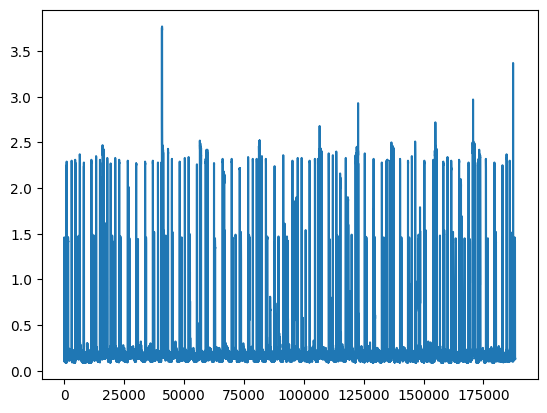

In [69]:
conso_data['kWh'].plot()

In [70]:
l=len(conso_data)-1
l

188231

In [71]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [72]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
188227,27801,0.13,27.801,129.491745,4473225027
188228,27580,0.13,27.580,130.529369,4473252607
188229,27658,0.13,27.658,130.161255,4473280265
188230,27778,0.13,27.778,129.598963,4473308043
188231,27261,0.13,27.261,132.056784,4473335304


In [73]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

4473335304000

In [74]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2024, 3, 7, 1, 50, 57, 428237)

In [75]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:51:23.717237,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:51:49.960237,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:52:15.845237,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:52:41.599237,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:53:07.373237,07/03/2024
...,...,...,...,...,...,...,...
188227,27801,0.13,27.801,129.491745,4473225027,2024-04-27 20:24:42.455237,27/04/2024
188228,27580,0.13,27.580,130.529369,4473252607,2024-04-27 20:25:10.035237,27/04/2024
188229,27658,0.13,27.658,130.161255,4473280265,2024-04-27 20:25:37.693237,27/04/2024
188230,27778,0.13,27.778,129.598963,4473308043,2024-04-27 20:26:05.471237,27/04/2024


In [76]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day, month, year


('27/04/2024', 4, 2024)

In [77]:
here = now.strftime('%H:%M:%S')
here

'20:26:38'

In [78]:
conso_data[conso_data['days']==day]

,Interval,kWh,sec,Wh,cumul(ms),dates,days
184963,34119,0.10,34.119,105.513057,4399744095,2024-04-27 00:00:01.523237,27/04/2024
184964,31973,0.11,31.973,112.595002,4399776068,2024-04-27 00:00:33.496237,27/04/2024
184965,32664,0.11,32.664,110.213079,4399808732,2024-04-27 00:01:06.160237,27/04/2024
184966,34095,0.10,34.095,105.587330,4399842827,2024-04-27 00:01:40.255237,27/04/2024
184967,33683,0.11,33.683,106.878841,4399876510,2024-04-27 00:02:13.938237,27/04/2024
...,...,...,...,...,...,...,...
188227,27801,0.13,27.801,129.491745,4473225027,2024-04-27 20:24:42.455237,27/04/2024
188228,27580,0.13,27.580,130.529369,4473252607,2024-04-27 20:25:10.035237,27/04/2024
188229,27658,0.13,27.658,130.161255,4473280265,2024-04-27 20:25:37.693237,27/04/2024
188230,27778,0.13,27.778,129.598963,4473308043,2024-04-27 20:26:05.471237,27/04/2024


In [79]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000

In [80]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.323526
dtype: float64

In [81]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.619846
dtype: float64

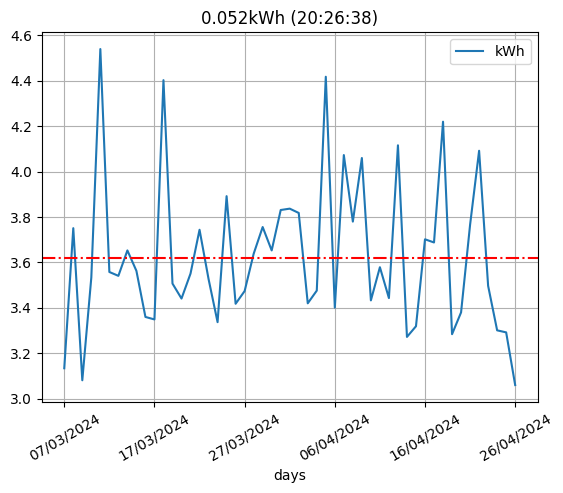

In [82]:
# plot the day consos in the group
df_grp.iloc[:-1].plot(grid=True)
plt.title(str(len(df_grp)/1000)+'kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [83]:
conso_day=conso_data[conso_data['days']==day]
conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_10412\36973937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:1,34119,0.10,34.119,105.513057,4399744095,2024-04-27 00:00:01.523237,27/04/2024
0:0:33,31973,0.11,31.973,112.595002,4399776068,2024-04-27 00:00:33.496237,27/04/2024
0:1:6,32664,0.11,32.664,110.213079,4399808732,2024-04-27 00:01:06.160237,27/04/2024
0:1:40,34095,0.10,34.095,105.587330,4399842827,2024-04-27 00:01:40.255237,27/04/2024
0:2:13,33683,0.11,33.683,106.878841,4399876510,2024-04-27 00:02:13.938237,27/04/2024
...,...,...,...,...,...,...,...
20:24:42,27801,0.13,27.801,129.491745,4473225027,2024-04-27 20:24:42.455237,27/04/2024
20:25:10,27580,0.13,27.580,130.529369,4473252607,2024-04-27 20:25:10.035237,27/04/2024
20:25:37,27658,0.13,27.658,130.161255,4473280265,2024-04-27 20:25:37.693237,27/04/2024


In [84]:
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('20:26:38', 3.269, 3269)

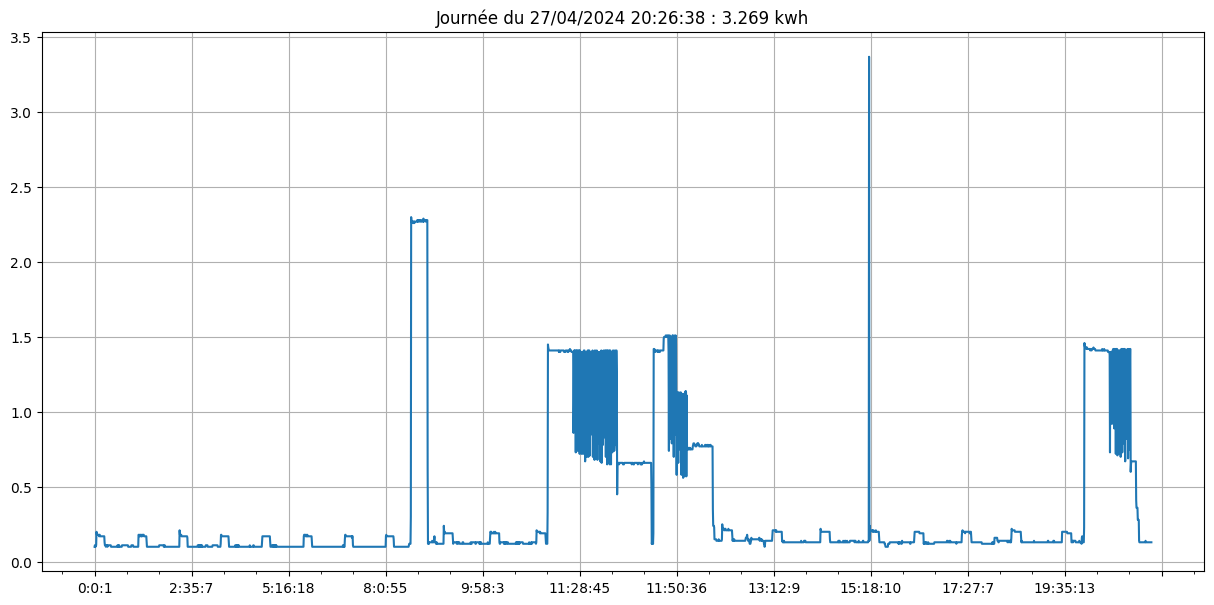

In [85]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
plt.grid()